In [1]:
# import necessary module
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import scipy
from array_response import *
import itertools 

In [2]:
Nt = 64 # number of transmit antennas
Nr = 16 # number of receive antennas
Ns = 1 # number of streams

Nc = 1 # number of cluster
Nray = 1 # number of rays in each cluster
realization = 10000 # equivalent to number of taking sample

At = np.zeros((Nt,Nc*Nray,realization),dtype=complex)
Ar = np.zeros((Nr,Nc*Nray,realization),dtype=complex)
alpha_hh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_hv = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vv = np.zeros((Nc*Nray,realization),dtype=complex)
var_hh = np.zeros((Nc*Nray,realization),dtype=float)

AoD = np.zeros((2,Nc*Nray),dtype=complex)
AoA = np.zeros((2,Nc*Nray),dtype=complex)

angle_sigma = 10/180*np.pi # standard deviation of the angles in azimuth and elevation both of Rx and Tx

gamma = np.sqrt((Nt*Nr)/(Nc*Nray))
count = 0

eps = 0.1 # 20dB isolation
sigma = np.sqrt(8/(1+eps**2)) # according to the normalization condition of H

for reali in range(realization):
    for c in range(1,Nc+1):
        AoD_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Departure _ azimuth
        AoD_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Departure _ elevation
        AoA_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Arrival_ azimuth
        AoA_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Arrival_ elevation
        AoD[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_azi_m, angle_sigma, (1,Nray))
        AoD[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_ele_m, angle_sigma, (1,Nray))
        AoA[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_azi_m, angle_sigma, (1,Nray))
        AoA[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_ele_m, angle_sigma, (1,Nray))
    for j in range(Nc*Nray):
        At[:,j,reali] = array_response(AoD[0,j],AoD[1,j],Nt) # UPA array response
        Ar[:,j,reali] = array_response(AoA[0,j],AoA[1,j],Nr)
        var_hh = ((sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[0,j])**2)).real
        var_hv = ((eps**2)*(sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[0,j])**2)).real
        var_vh = ((eps**2)*(sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[1,j])**2)).real
        var_vv = ((sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[1,j])**2)).real
        alpha_hh[j,reali] = np.random.normal(0, np.sqrt(var_hh/2)) + 1j*np.random.normal(0, np.sqrt(var_hh/2))
        alpha_hv[j,reali] = np.random.normal(0, np.sqrt(var_hv/2)) + 1j*np.random.normal(0, np.sqrt(var_hv/2))
        alpha_vh[j,reali] = np.random.normal(0, np.sqrt(var_vh/2)) + 1j*np.random.normal(0, np.sqrt(var_vh/2))
        alpha_vv[j,reali] = np.random.normal(0, np.sqrt(var_vv/2)) + 1j*np.random.normal(0, np.sqrt(var_vv/2))

In [4]:
azi_rot = np.random.uniform(0,2*np.pi,realization)
ele_rot = np.random.uniform(0,np.pi/2,realization) # Why PI/2 ??
ht_hr = np.zeros(realization,dtype=complex)
vt_hr = np.zeros(realization,dtype=complex)
ht_vr = np.zeros(realization,dtype=complex)
vt_vr = np.zeros(realization,dtype=complex)
same_cluster = np.zeros(realization,dtype=complex)
cross_polar = np.zeros(realization,dtype=complex)
same_polar = np.zeros(realization,dtype=complex)

for reali in range(realization):
    ht_hr[reali] = np.cos(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hh[0,reali]+np.sin(ele_rot[reali])*alpha_vh[0,reali]
    vt_hr[reali] = np.cos(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hv[0,reali]+np.sin(ele_rot[reali])*alpha_vv[0,reali]
    ht_vr[reali] = -np.sin(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hh[0,reali]+np.cos(ele_rot[reali])*alpha_vh[0,reali]
    vt_vr[reali] = -np.sin(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hv[0,reali]+np.cos(ele_rot[reali])*alpha_vv[0,reali]
    same_cluster[reali] = ht_hr[reali]+vt_hr[reali]+ht_vr[reali]+vt_vr[reali]
    cross_polar[reali] = vt_hr[reali]+ht_vr[reali]
    same_polar[reali] = ht_hr[reali]+vt_vr[reali]

In [ ]:
cross_polar

2.09516423952
-0.0161546738101


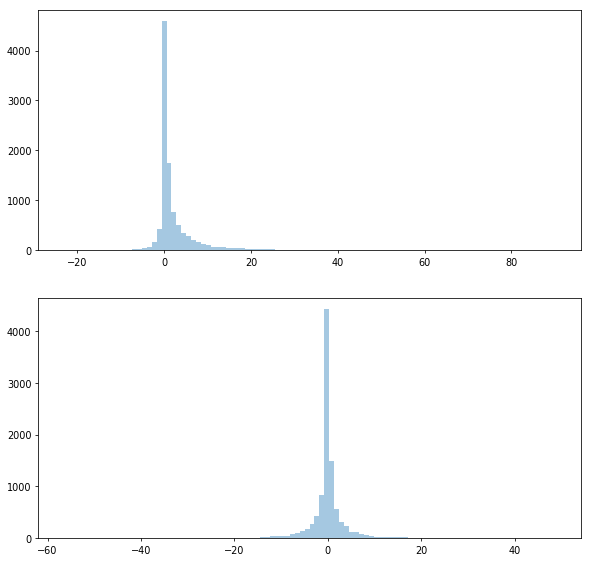

In [14]:
fig = plt.figure(figsize=(10,10), dpi=70)
# ax1 = fig.add_subplot(611)
# ax2 = fig.add_subplot(612)
# ax3 = fig.add_subplot(613)
# ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(211)
ax6 = fig.add_subplot(212)
# sns.distplot(np.abs(alpha_hh).reshape(1,-1),kde=False, ax=ax1)
# sns.distplot(np.angle(alpha_hh).reshape(1,-1),bins=100, kde = False, ax=ax2)
# sns.distplot(np.abs(ht_hr),bins=100, kde = False, ax=ax2)
# sns.distplot(np.angle(ht_hr),bins=100, kde = False, ax=ax4)
# sns.distplot(np.abs(same_cluster)**2,bins=100, kde = False, ax=ax3)
# sns.distplot(np.abs(cross_polar)**2,bins=100, kde = False, ax=ax4)
sns.distplot(np.abs(same_cluster)**2 - np.abs(cross_polar)**2,bins=100, kde = False, ax=ax5)
sns.distplot(np.abs(same_polar)**2 - np.abs(cross_polar)**2,bins=100, kde = False, ax=ax6, )
print(np.mean(np.abs(same_cluster)**2 - np.abs(cross_polar)**2))
print(np.mean(np.abs(same_polar)**2 - np.abs(cross_polar)**2))

Not use now !!

np.mean(var_hh) == np.mean(sigma/8)

In [ ]:
Ns = 1 # number of streams

Nc = 6 # number of cluster
Nray = 1 # number of rays in each cluster

Nt = 64 # number of transmit antennas
Nr = 16 # number of receive antennas

angle_sigma = 10/180*np.pi # standard deviation of the angles in azimuth and elevation both of Rx and Tx

gamma = np.sqrt((Nt*Nr)/(Nc*Nray))
realization = 1000 # equivalent to number of taking sample
count = 0

eps = 0.1 # 20dB isolation
sigma = np.sqrt(8/(1+eps**2)) # according to the normalization condition of H

H_pol = np.zeros((2*Nr,2*Nt,realization),dtype=complex)
At = np.zeros((Nt,Nc*Nray,realization),dtype=complex)
Ar = np.zeros((Nr,Nc*Nray,realization),dtype=complex)
alpha_hh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_hv = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vv = np.zeros((Nc*Nray,realization),dtype=complex)
var_hh = np.zeros((Nc*Nray,realization),dtype=float)

AoD = np.zeros((2,Nc*Nray),dtype=complex)
AoA = np.zeros((2,Nc*Nray),dtype=complex)

H = np.zeros((2*Nr,2*Nt,realization),dtype=complex)
azi_rot = np.random.uniform(0,2*np.pi,realization)
ele_rot = np.random.uniform(0,np.pi/2,realization) # Why PI/2 ??
R = np.array([[np.cos(ele_rot)*np.cos(azi_rot),np.sin(ele_rot)],[-np.sin(ele_rot)*np.cos(azi_rot),np.cos(ele_rot)]]) # rotation matrix

for reali in range(realization):
    for c in range(1,Nc+1):
        AoD_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Departure _ azimuth
        AoD_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Departure _ elevation
        AoA_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Arrival_ azimuth
        AoA_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Arrival_ elevation
        AoD[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_azi_m, angle_sigma, (1,Nray))
        AoD[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_ele_m, angle_sigma, (1,Nray))
        AoA[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_azi_m, angle_sigma, (1,Nray))
        AoA[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_ele_m, angle_sigma, (1,Nray))
    for j in range(Nc*Nray):
        At[:,j,reali] = array_response(AoD[0,j],AoD[1,j],Nt) # UPA array response
        Ar[:,j,reali] = array_response(AoA[0,j],AoA[1,j],Nr)
        var_hh[j,reali] = ((sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[0,j])**2)).real
#         var_hh = ((sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[0,j])**2)).real
#         var_hv = ((eps**2)*(sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[0,j])**2)).real
#         var_vh = ((eps**2)*(sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[1,j])**2)).real
#         var_vv = ((sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[1,j])**2)).real
#         alpha_hh[j,reali] = np.random.normal(0, np.sqrt(var_hh/2)) + 1j*np.random.normal(0, np.sqrt(var_hh/2))
#         alpha_hv[j,reali] = np.random.normal(0, np.sqrt(var_hv/2)) + 1j*np.random.normal(0, np.sqrt(var_hv/2))
#         alpha_vh[j,reali] = np.random.normal(0, np.sqrt(var_vh/2)) + 1j*np.random.normal(0, np.sqrt(var_vh/2))
#         alpha_vv[j,reali] = np.random.normal(0, np.sqrt(var_vv/2)) + 1j*np.random.normal(0, np.sqrt(var_vv/2))
#         alpha = np.vstack((np.hstack((alpha_hh[j,reali],alpha_hv[j,reali])),np.hstack((alpha_vh[j,reali],alpha_vv[j,reali]))))

In [ ]:
var_hh_test = var_hh.reshape(6000,1)
n, bins, patches = plt.hist(var_hh_test,bins=100)
plt.show()


In [ ]:
plt.plot(var_hh_test[0:6000])
plt.show()

In [ ]:
# print(alpha_hh.shape)
# print(alpha_hh[:,0])
# print(sigma)
# print(np.mean(alpha_hh))
print(np.mean(np.abs(alpha_hh)))
print(np.mean(np.abs(alpha_vv)))
print(np.mean(np.abs(alpha_hv)))
print((sigma*np.sqrt(np.pi)/4)/5*4)

In [ ]:
Ns = 1 # number of streams

Nc = 6 # number of cluster
Nray = 1 # number of rays in each cluster

Nt = 64 # number of transmit antennas
Nr = 16 # number of receive antennas

angle_sigma = 10/180*np.pi # standard deviation of the angles in azimuth and elevation both of Rx and Tx

gamma = np.sqrt((Nt*Nr)/(Nc*Nray))
realization = 1000 # equivalent to number of taking sample
count = 0

eps = 0.1 # 20dB isolation
sigma = np.sqrt(8/(1+eps**2)) # according to the normalization condition of H

test_cos = np.zeros(10000)
test_cos_multi = np.zeros(10000)
test_var_hh_square = np.zeros(10000)
test_var_hh_cube = np.zeros(10000)
test_var_substract= np.zeros(10000)
test_substract_cossin = np.zeros(10000)
test_add_cossin = np.zeros(10000)
for i in range(10000):
    test_cos[i] = np.cos(np.random.uniform(0,2*np.pi))
    test_cos_multi[i] = np.cos(np.random.uniform(0,2*np.pi))*np.cos(np.random.uniform(0,2*np.pi))
    test_var_hh_square[i] = (sigma*np.cos(np.random.uniform(0,2*np.pi))*np.cos(np.random.uniform(0,2*np.pi)))**2
    test_var_hh_cube[i] = (sigma*np.cos(np.random.uniform(0,2*np.pi))*np.cos(np.random.uniform(0,2*np.pi))*np.cos(np.random.uniform(0,2*np.pi)))**2
    test_var_substract[i] = test_var_hh_square[i] - test_var_hh_cube[i]
    alpha = np.random.uniform(0,np.pi)
    test_substract_cossin[i] = -np.sin(alpha) + np.cos(alpha)
    test_add_cossin[i] = np.sin(alpha) + np.cos(alpha)
    

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=70)
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
sns.distplot(test_cos,bins=100, kde = False, ax=ax1)
sns.distplot(test_cos_multi,bins=100, kde = False, ax=ax2)
sns.distplot(test_var_hh_square,bins=100, kde = False, ax=ax3)
sns.distplot(test_var_substract,bins=100, kde = False, ax=ax4)
sns.distplot(test_substract_cossin,bins=100, kde = False, ax=ax5)
sns.distplot(test_add_cossin,bins=100, kde = False, ax=ax6)

